<a href="https://colab.research.google.com/github/pearcej/TSP-Greedy/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

Name: Oussema Khlifi

**SUMMARY**: Initially, I started working on extracting the data and setting the coordinates hashmap. Then, I started the getRoutes method and started implementing the Nearest Neighbor Algorithm. 

As I progressed, I refined the algorithm to handle tie-breaking cases consistently by selecting the city with the lower node ID when distances were equal. The final result is a program that reads city coordinates, computes a tour starting from a specified city, and visualizes the tour on a graph. I spent approximately 8 hours on coding and debugging.

**PERSONNEL**: I worked independently on this lab.

**CHALLENGES**: One of the biggest challenges I faced was correctly implementing the greedy algorithm with proper tie-breaking to ensure consistent results. Initially, my algorithm didn't always produce the expected output because it didn't handle cases where multiple cities were at the same distance from the current city. To overcome this, I modified the code to sort the list of unvisited cities and choose the one with the smallest node ID in case of equal distances. Another challenge was dealing with an infinite loop caused by incorrect indentation in the getRoute method. Careful debugging and attention to code structure helped me resolve this issue.

**INNOVATIONS**: As an additional feature, I added a method to print a table of node IDs and their corresponding coordinates. This enhancement made it easier to visualize and verify the mapping between nodes and cities. I also improved the graph visualization by labeling nodes with both their IDs and coordinates, which provides a clearer understanding of the tour's progression.

**TESTING**: To test my program, I used the provided tsp-small.txt dataset and verified that the output matched the expected tour sequence. I also ran the program with a larger dataset (tsp-48.txt) to ensure it could handle more extensive inputs without errors. By comparing the generated tours and visualizations with the input data, I confirmed that the algorithm was functioning correctly. Additionally, I tested edge cases where cities have the same coordinates to ensure the tie-breaking mechanism worked as intended.

**ERRORS**: NONE

**COMMENTS**: I found this lab both challenging and rewarding. It deepened my understanding of greedy algorithms and their application to the TSP. I learned a lot about the implementation of the Nearest neighbor Algorithm!

## Import Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [11]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)


6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class


Node ID	Coordinates (X, Y)
------------------------------
1	(1.0, 5.0)
2	(3.0, 7.0)
3	(5.0, 11.0)
4	(3.0, 5.0)
5	(5.0, 7.0)
6	(7.0, 9.0)
------------------------------
6
1 5
3 5
3 7
5 7
7 9
5 11


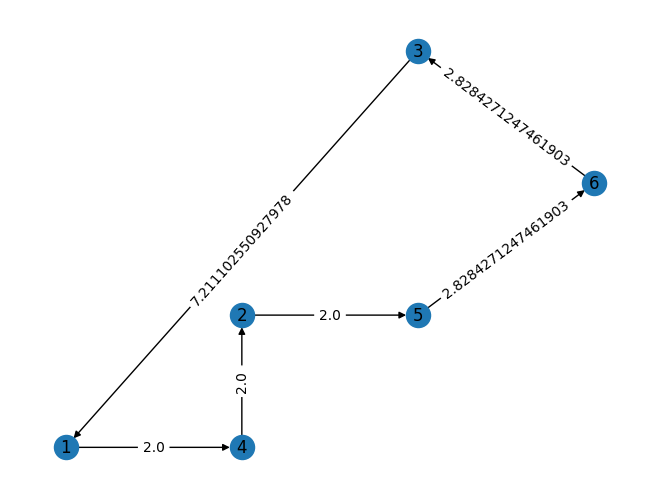

In [14]:
"""
Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing. 
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = [] 

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        lines = tspdata.strip().split('\n')
        
        # Ensuring that the first line contains the dimension
        if lines:
            self.dimension = int(lines[0].strip())
        
        else:
            return

        #Extracting the coordinates for each node
        for idx, line in enumerate(lines[1:], start=1):
            if line.strip() == '':
                continue  # Skip empty lines
            
            try:
                # Splitting the coordinates
                x_str, y_str = line.strip().split()
                x, y = float(x_str), float(y_str)
                node_id = idx  # Nodes numbered starting from 1
                self.nodeData.append((node_id, x, y))
            except ValueError:
                print(f"Invalid line format at line {idx + 1}: '{line}'")



    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        
        # Iterating through node data and populating the dictionary of coordinates
        for node_data in self.nodeData:
            node_id = node_data[0]
            x = node_data[1]
            y = node_data[2]
            self.coords[node_id] = (x, y)


    def calculateDistance(self, a, b): 
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        
        # Euclidean distance formula
        return math.sqrt( ((a[0]-b[0])**2) +((a[1]-b[1])**2) )

    
    def getRoute(self, current, visits=None, nVisits=None, needList=True): 
        """Generates the tour using the greedy algorithm starting from the given node.
        Arguments:
            current {int} -- the node to start at.
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {None})
            nVisits {list} -- list of places not visited (default: {None})
            needList {bool} -- whether to initialize the list of unvisited nodes (default: {True})
        """
        
        # Initializing the list of unvisited nodes if needed
        if needList or nVisits is None:
            nVisits = self.listPlaces()
            nVisits.remove(current) # removing the starting node from unvisited
        if visits is None:
            visits = [current]
        else:
            visits.append(current)
        self.route = [current] # Start the route with the starting node

        while nVisits:
            current_coord = self.coords[current]
            
            # Find the nearest unvisited neighbor with tie-breaking
            nearest_neighbor = None
            min_distance = float('inf')
            for node in sorted(nVisits):  #  Sort nodes to have a consistent tie-breaker
                node_coord = self.coords[node]
                distance = self.calculateDistance(current_coord, node_coord)
                if distance < min_distance:
                    min_distance = distance
                    nearest_neighbor = node
                elif distance == min_distance and node < nearest_neighbor:
                    # Tie-breaker: choose the node with the lower ID
                    nearest_neighbor = node
            # Update current node and route after the for loop
            current = nearest_neighbor
            visits.append(current)
            self.route.append(current)
            nVisits.remove(current) # Mark the node as visited


        

    def beGreedy(self, start): 
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        
        self.getRoute(start)
        self.route.append(start) # Return to the start node

    def listPlaces(self): 
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        return list(self.coords.keys())


    def cleanUpList(self, visited, notVisited): 
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self): 
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self): 
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()

    def printNodeTable(self):
        """Prints a table of Node IDs and their Coordinates."""
        print("\nNode ID\tCoordinates (X, Y)")
        print("-" * 30)
        for node_id in sorted(self.coords.keys()):
            x, y = self.coords[node_id]
            print(f"{node_id}\t({x}, {y})")
        print("-" * 30)


def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    
    tsp.printNodeTable()
    
    print(tsp.dimension)
    for node in tsp.route[:-1]:  # Exclude the last node if it's the same as the first
        x, y = tsp.coords[node]
        print(f"{int(x)} {int(y)}")
    
    tsp.showGraph()
main()

### As we see in the graph, the route is:
 1 -> 4 -> 2 -> 5 -> 6 -> 3 -> 1